In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import shap

from sklearn.model_selection import train_test_split 

In [2]:
train_df = pd.read_csv('./train_df.csv')
test_df = pd.read_csv('./test_df.csv')

Y = train_df['label'][:200]
X = train_df.drop('label', axis=1)[:200]

train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.2, random_state=1337, stratify = Y)

In [3]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(train_data, train_label)

KNeighborsClassifier()

In [4]:
explainer = shap.Explainer(KNN.predict, X)
shap_values = explainer(X)

Permutation explainer: 201it [05:03,  1.51s/it]                                                                                                                                               


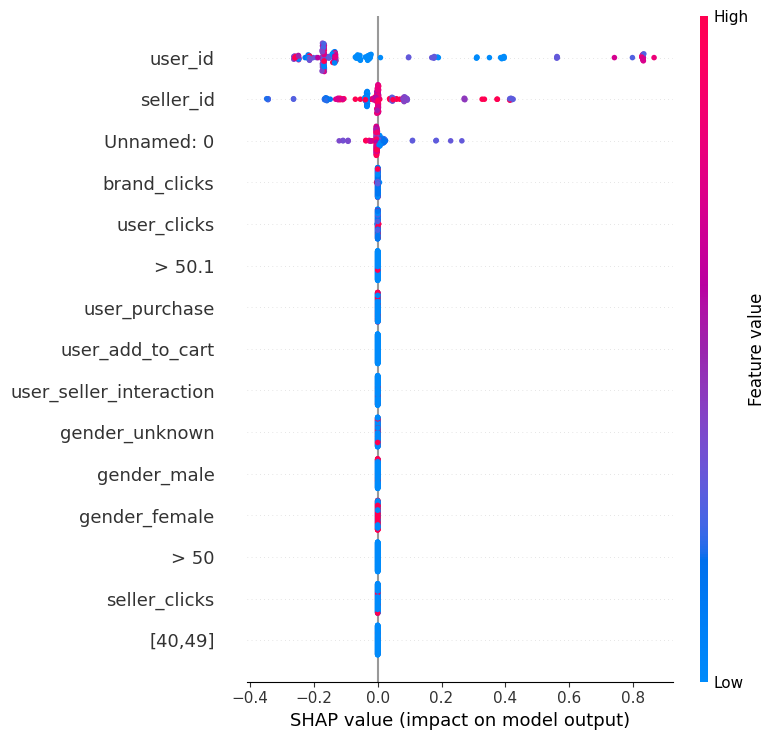

In [5]:
shap.summary_plot(shap_values, max_display=15, show=False)

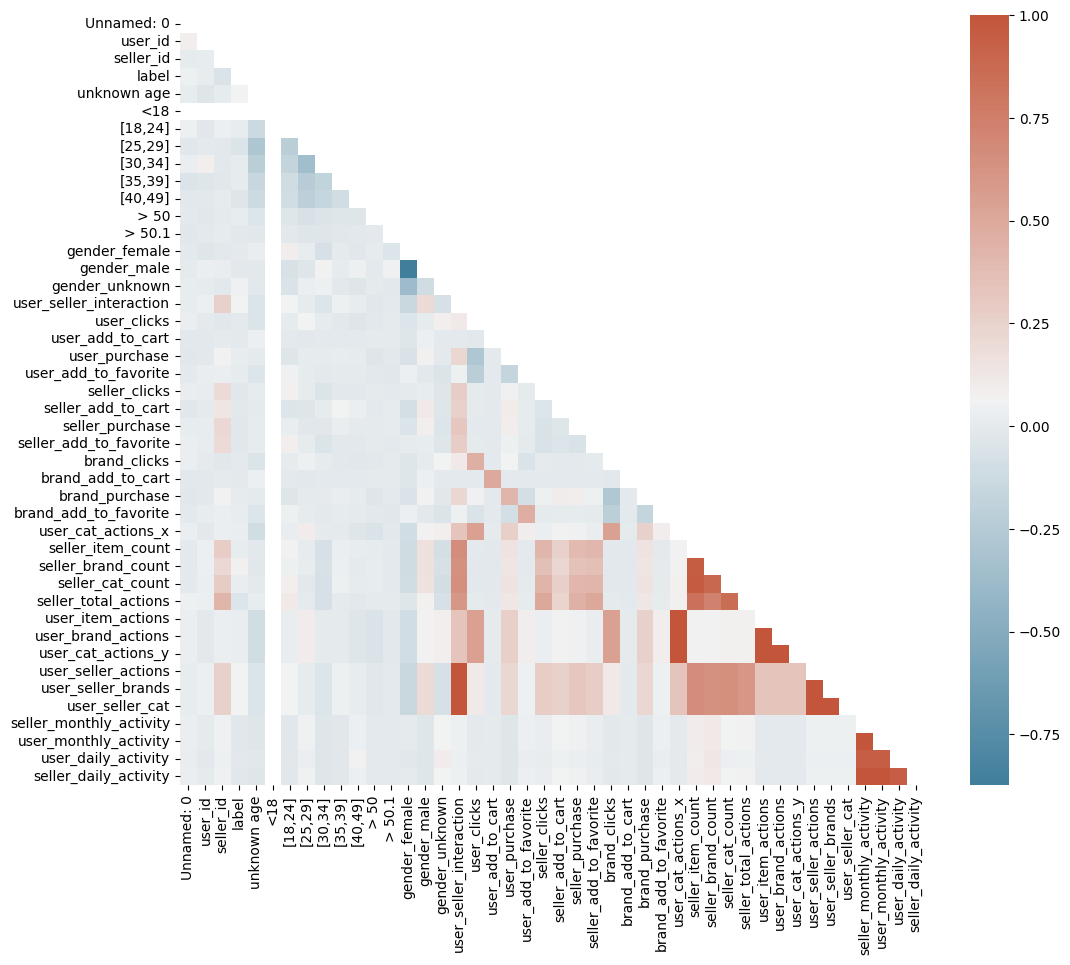

In [6]:
corr = train_df.corr()

f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask = mask, cmap=cmap)
plt.show()

In [7]:
from sklearn.decomposition import PCA
pca = PCA(5)
pca.fit(X)

PCA(n_components=5)

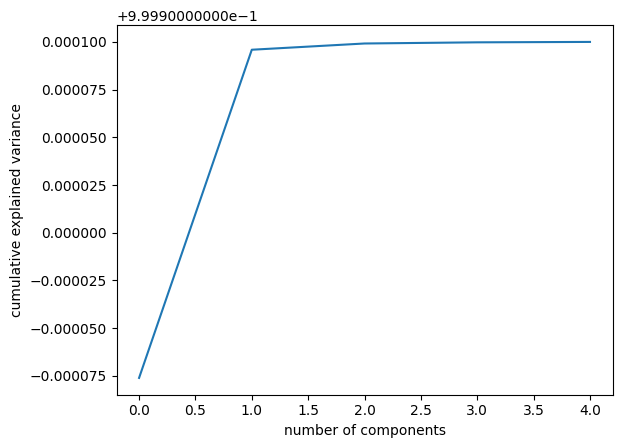

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');